# Convolutional Neural Networks

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import time

In [70]:
print(3e-4)

0.0003


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision # datasets and pretrained neural nets
import torch.utils.data
import torch.nn.functional as F
import torchvision.transforms as transforms

import os
dp = os.environ.get('DATA_PATH')
data = dp + 'AI_Cheats/'

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.48216, 0.44653),
        (0.24703, 0.24349, 0.26159)
    )
])

dataset = data + 'CIFAR10/'

trainset = torchvision.datasets.CIFAR10(root=dataset, train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=dataset, train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

100%|██████████| 170498071/170498071 [00:13<00:00, 12361802.46it/s]


Extracting /Volumes/Library/SynologyDrive/data/AI_Cheats/CIFAR10/cifar-10-python.tar.gz to /Volumes/Library/SynologyDrive/data/AI_Cheats/CIFAR10/
Files already downloaded and verified


In [11]:
trainset.data.shape

(50000, 32, 32, 3)

## Building convolutional network

In [12]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) # 32-3+2+1 = 32
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool=nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 4 * 4, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 16 x 16
        x = self.pool(F.relu(self.conv2(x))) # 8 x 8
        x = self.pool(F.relu(self.conv3(x))) # 4 x 4        feature map C x W x H --> linear.
        x = x.view(-1, 128 * 4 * 4)
        return self.fc(x) # (batch size, num_classes)


In [13]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=3e-4)

In [14]:
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

## Training

In [15]:
num_epochs = 10

since = time.time()
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch + 1, num_epochs))

    running_loss = 0.0
    running_corrects = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward + backward + optimize
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / trainloader.dataset.data.shape[0]
    epoch_acc = running_corrects.double() / trainloader.dataset.data.shape[0]

    print('train loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    print('_' * 10)

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Epoch 1/10
train loss: 1.4295 Acc: 0.4891
__________
Epoch 2/10
train loss: 1.0601 Acc: 0.6270
__________
Epoch 3/10
train loss: 0.8944 Acc: 0.6905
__________
Epoch 4/10
train loss: 0.7935 Acc: 0.7264
__________
Epoch 5/10
train loss: 0.7156 Acc: 0.7537
__________
Epoch 6/10
train loss: 0.6505 Acc: 0.7766
__________
Epoch 7/10
train loss: 0.5952 Acc: 0.7968
__________
Epoch 8/10
train loss: 0.5469 Acc: 0.8132
__________
Epoch 9/10
train loss: 0.5003 Acc: 0.8281
__________
Epoch 10/10
train loss: 0.4540 Acc: 0.8436
__________
Training complete in 11m 34s


## Evaluation

fc acc 53%

In [16]:
correct, total = 0, 0
predictions = []
net.eval() # mode:1.train(), 2.eval()
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item() 

print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

The testing set accuracy of the network is: 75 %


## Add Validation

In [17]:
import numpy as np
indices = np.arange(50000)
indices

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [18]:
np.random.shuffle(indices)
indices

array([45150,  4099, 28966, ...,  8822, 44070, 25357])

In [21]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root = dataset, train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])), batch_size=1, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:45000])
)

val_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root=dataset, train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.485, 0.456, 0.406), (0.229, 0.224, 0.225)])), batch_size=1, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[45000:50000])
)

Files already downloaded and verified
Files already downloaded and verified


## Save and Load models

In [22]:
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

In [23]:
'state_dict()'

'state_dict()'

In [24]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, '\t', net.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([32, 3, 3, 3])
conv1.bias 	 torch.Size([32])
conv2.weight 	 torch.Size([64, 32, 3, 3])
conv2.bias 	 torch.Size([64])
conv3.weight 	 torch.Size([128, 64, 3, 3])
conv3.bias 	 torch.Size([128])
fc.weight 	 torch.Size([10, 2048])
fc.bias 	 torch.Size([10])


In [25]:
optimizer.state_dict()['param_groups']

[{'lr': 0.0003,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0, 1, 2, 3, 4, 5, 6, 7]}]

### Saving & Loading Model for Inference

In [26]:
# Save
PATH = dataset + 'models/model_torch.pth'
torch.save(net.state_dict(), PATH)

In [27]:
# Load 
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_93831/251392243.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

The 1.6 release of PyTorch switched torch.save to use a new zipfile-based file format. torch.load still retains the ability to load files in the old format. If for any reason you want torch.save to use the old format, pass the kwarg `_use_new_zipfile_serialization=False`.

### Save/Load Entire Model

In [28]:
# Save
torch.save(model, PATH)

In [29]:
# Load
abd = torch.load(PATH)
abd.eval()

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_93831/1142009068.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  abd = torch.load(PATH)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

### Saving & Loading a General Checkpoint for Inference and/or Resuming Training

In [30]:
# Save
PATH_CHECKPOINT = dataset + 'models/checkpoint.tar'
torch.save({
    'epoch': epoch,
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, PATH_CHECKPOINT)

In [31]:
# Load
model = Net()
optimizer = optim.Adam(net.parameters(), lr=3e-4)

checkpoint = torch.load(PATH_CHECKPOINT)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# -- or --
model.train()

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_93831/2965074813.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(PATH_CHECKPOINT)


<All keys matched successfully>

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

### Saving Multiple Models in One File

In [ ]:
# Save
torch.save({
    'modelA_state_dict': modelA.state_dict(),
    'modelB_state_dict': modelB.state_dict(),
    'optimizerA_state_dict': optimizerA.state_dict(),
    'optimizerB_state_dict': optimizerB.state_dict(),
    ...
}, PATH)

In [ ]:
# Load
modelA = ModelA(*args, **kwargs)
modelB = ModelB(*args, **kwargs)
optimizerA = OptimizerA(*args, **kwargs)
optimizerB = OptimizerB(*args, **kwargs)

checkpoint = torch.load(PATH)
modelA.load_state_dict(checkpoint['modelA_state_dict'])
modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizerA.load_state_dict(checkpoint['optimizerA_state_dict'])
optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

modelA.eval()
modelB.eval()
# - or -
modelA.train()
modelB.train()

## Arch
AlexNet

In [34]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),)
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6)) # 最终输出的 size
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes))

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [35]:
alex = AlexNet()
alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### VGG

In [40]:
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Linear(512, 10)
        
    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [
                    nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                    nn.BatchNorm2d(x),
                    nn.ReLU(inplace=True)
                ]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


def test():
    net = VGG('VGG11')
    x = torch.randn(2, 3, 32, 32)
    y = net(x)
    print(y.size())

In [41]:
test()

torch.Size([2, 10])


In [42]:
vgg_16 = VGG('VGG16')
vgg_16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

## Transfer Learning

### Freeze

In [43]:
alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [44]:
alex.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [45]:
# Freeze all the layers bar the final one
for param, name in zip(alex.parameters(), alex.state_dict().keys()):
    s = param.requires_grad
    param.requires_grad = False
    print(name, ':', s, param.requires_grad)

features.0.weight : True False
features.0.bias : True False
features.3.weight : True False
features.3.bias : True False
features.6.weight : True False
features.6.bias : True False
features.8.weight : True False
features.8.bias : True False
features.10.weight : True False
features.10.bias : True False
classifier.1.weight : True False
classifier.1.bias : True False
classifier.4.weight : True False
classifier.4.bias : True False
classifier.6.weight : True False
classifier.6.bias : True False


In [46]:
alex.classifier[6] = nn.Linear(4096, 10)
for param, name in zip(alex.parameters(), alex.state_dict().keys()):
    print(name, ':', param.requires_grad)

features.0.weight : False
features.0.bias : False
features.3.weight : False
features.3.bias : False
features.6.weight : False
features.6.bias : False
features.8.weight : False
features.8.bias : False
features.10.weight : False
features.10.bias : False
classifier.1.weight : False
classifier.1.bias : False
classifier.4.weight : False
classifier.4.bias : False
classifier.6.weight : True
classifier.6.bias : True


In [47]:
alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Framework

In [48]:
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

In [60]:
# Load Data
'''
Data augmentation and normalization for training
Just normalization for validation
'''

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = dp + 'AI_Cheats/hymenoptera_data'
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']
}

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=1) for x in ['train', 'val']
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in ['train', 'val']
}
class_names = image_datasets['train'].classes

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

'\nData augmentation and normalization for training\nJust normalization for validation\n'

In [61]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: /Volumes/Library/SynologyDrive/data/AI_Cheats/hymenoptera_data/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: /Volumes/Library/SynologyDrive/data/AI_Cheats/hymenoptera_data/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [62]:
dataset_sizes
class_names

{'train': 244, 'val': 153}

['ants', 'bees']

#### Visualize

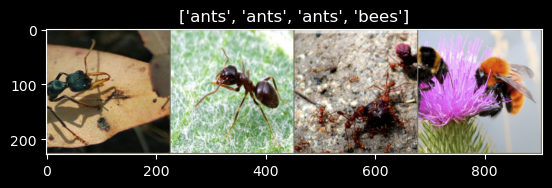

In [63]:
def imshow(inp, title=None):
    '''
    Imshow for Tensor.
    '''
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

#### Training function
- Scheduling the learning rate
- Saving the best model

In [64]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train() # Set model to training mode
            else:
                model.eval() # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {: .0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('Best val Acc: {:.4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

#### Finetuning the convenet
Load a pretrained model and reset final fully connected layer

In [65]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [66]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [67]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train loss: 0.4972 Acc: 0.7254
val loss: 0.3064 Acc: 0.8758

Epoch 1/9
----------
train loss: 0.5330 Acc: 0.7951
val loss: 0.3404 Acc: 0.8693

Epoch 2/9
----------
train loss: 0.4829 Acc: 0.8074
val loss: 0.5938 Acc: 0.7778

Epoch 3/9
----------
train loss: 0.7340 Acc: 0.7418
val loss: 0.4018 Acc: 0.8431

Epoch 4/9
----------
train loss: 0.5478 Acc: 0.8074
val loss: 0.4937 Acc: 0.8431

Epoch 5/9
----------
train loss: 0.4171 Acc: 0.8033
val loss: 0.3971 Acc: 0.8758

Epoch 6/9
----------
train loss: 0.4249 Acc: 0.8279
val loss: 0.3056 Acc: 0.9085

Epoch 7/9
----------
train loss: 0.2928 Acc: 0.8689
val loss: 0.2626 Acc: 0.9281

Epoch 8/9
----------
train loss: 0.3111 Acc: 0.8770
val loss: 0.2511 Acc: 0.9216

Epoch 9/9
----------
train loss: 0.2237 Acc: 0.9098
val loss: 0.2547 Acc: 0.9346

Training complete in  5m 3s
Best val Acc: 0.9346


#### ConvNet as fixed feature extractor

Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward().

In [68]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly sconstructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before
optimizer_con = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_con, step_size=7, gamma=0.1)

/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [69]:
model_conv = train_model(model_conv, criterion, optimizer_con, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train loss: 0.5737 Acc: 0.7049
val loss: 0.2314 Acc: 0.9542

Epoch 1/24
----------
train loss: 0.5754 Acc: 0.7500
val loss: 0.2029 Acc: 0.9542

Epoch 2/24
----------
train loss: 0.4566 Acc: 0.8033
val loss: 0.2796 Acc: 0.8824

Epoch 3/24
----------
train loss: 0.4573 Acc: 0.7992
val loss: 0.2092 Acc: 0.9346

Epoch 4/24
----------
train loss: 0.3681 Acc: 0.8320
val loss: 0.3608 Acc: 0.8431

Epoch 5/24
----------
train loss: 0.4307 Acc: 0.7869
val loss: 0.1887 Acc: 0.9542

Epoch 6/24
----------
train loss: 0.4244 Acc: 0.8197
val loss: 0.1841 Acc: 0.9542

Epoch 7/24
----------
train loss: 0.3385 Acc: 0.8443
val loss: 0.2113 Acc: 0.9346

Epoch 8/24
----------
train loss: 0.3421 Acc: 0.8525
val loss: 0.1859 Acc: 0.9608

Epoch 9/24
----------
train loss: 0.3297 Acc: 0.8607
val loss: 0.2349 Acc: 0.9216

Epoch 10/24
----------
train loss: 0.3263 Acc: 0.8689
val loss: 0.1949 Acc: 0.9477

Epoch 11/24
----------
train loss: 0.3155 Acc: 0.8770
val loss: 0.1808 Acc: 0.9608

Epoch 12/24
----------
t